Interessant: falske positiver/negativer. Dette viser nok biasene i størst grad.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("..//Data/compas-scores-two-years.csv")
display(df.columns)
display(df)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [42]:
"""for i in range(0,7213,100):
    if df['priors_count'][i] != df['priors_count.1'][i]:
        print('ohno')"""

In [10]:
df = df[df["days_b_screening_arrest"] <= 30]
df = df[df["days_b_screening_arrest"] >= -30]

In [11]:
display(df)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [19]:
display(df['vr_charge_desc'])
vtype = df['v_type_of_assessment'].to_numpy()

result = np.all(vtype == vtype[0])
if result:
    print('All Values in Array are same / equal')
else:
    print('All Values in Array are not same')

0                               NaN
1       Felony Battery (Dom Strang)
2                               NaN
5                               NaN
6                               NaN
                   ...             
7209                            NaN
7210                            NaN
7211                            NaN
7212                            NaN
7213                            NaN
Name: vr_charge_desc, Length: 6172, dtype: object

All Values in Array are same / equal


In [51]:
test = df.dropna(subset=['v_decile_score'])
display(test['v_decile_score'])

0       1
1       1
2       3
5       1
6       2
       ..
7209    5
7210    5
7211    1
7212    2
7213    4
Name: v_decile_score, Length: 6172, dtype: int64

In [46]:
"""Hvilke skal vi ha med?
'sex', 'age_cat', 'race', 'juv_fel_count', 'decile_score','juv_misd_count', 'juv_other_count', 'priors_count',
'c_days_from_compas', 'c_charge_degree', 'is_recid','is_violent_recid', 'decile_score.1','score_text', 'v_score_text',
'v_screening_date', 'priors_count.1','event', 'two_year_recid'
"""

"Hvilke skal vi ha med?\n'sex', 'age_cat', 'race', 'juv_fel_count', 'decile_score','juv_misd_count', 'juv_other_count', 'priors_count',\n       'days_b_screening_arrest', 'c_days_from_compas', 'c_charge_degree', 'is_recid','r_days_from_arrest', \n       'r_offense_date', 'r_jail_in', 'r_jail_out', 'is_violent_recid', 'vr_offense_date', 'decile_score.1', \n       'score_text', 'screening_date', 'v_decile_score', 'v_score_text',\n       'v_screening_date', 'priors_count.1','event', 'two_year_recid'\n"

# Oppgave d) (gjort kjapt)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import plot_partial_dependence

In [106]:
#laster inn data (på nytt for ordens skyld)
data = pd.read_csv("..//Data/compas-scores-two-years.csv")

In [134]:
# velger hensiktsmessig data (kopierer fra oppgavetekst)
X = data[["age_cat", "race", "sex", "priors_count", "c_charge_degree", "two_year_recid"]]
categorical_cols = ["age_cat", "race", "sex", "c_charge_degree"]
X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_')
X = X.drop(["age_cat_25 - 45", "race_Caucasian", "sex_Male", "c_charge_degree_F"], axis=1)
Y = data["score_text"] != "Low"
# splitter dataen i fire med den flotte train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [135]:
# trener og tester superkjapt med sklearn sine innebygde funksjoner
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(X_train, Y_train)
Y_mdl = model.predict(X_test)
print(accuracy_score(Y_mdl, Y_test))

0.760914760914761


### Partial dependance

In [125]:
#hvilke kolonner har vi med å gjøre?
display(X)

,priors_count,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Hispanic,race_Native American,race_Other,sex_Female,c_charge_degree_M
0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0
2,4,1,0,1,1,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7209,0,0,0,1,1,0,0,0,0,0,0
7210,0,0,0,1,1,0,0,0,0,0,0
7211,0,0,1,0,0,0,0,0,1,0,0
7212,3,0,0,0,1,0,0,0,0,1,1


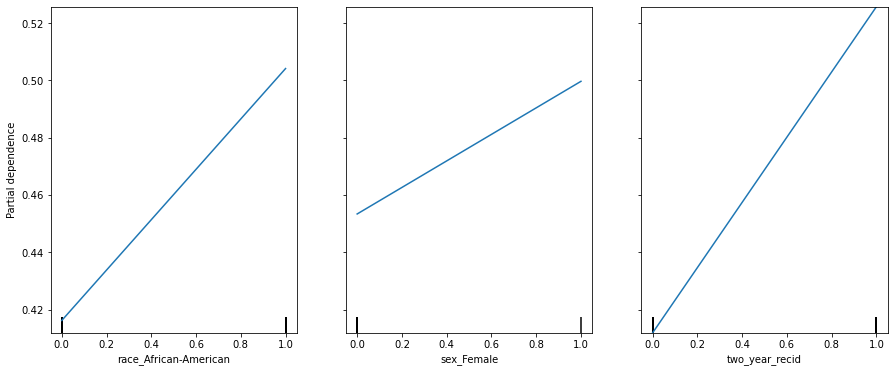

In [126]:
#plotter partial dependance
#her bør det undersøkes mye mer
features = ["race_African-American","sex_Female","two_year_recid"]
plot_partial_dependence(model, X_train, features)
plt.gcf().set_size_inches(15, 6)

## Vekten mht etnisitet??

In [149]:
def sigmoid(z):    
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

In [151]:
# her står det at man bør få 1.45... men tror dette er nogenlunde riktig
control = sigmoid(model.intercept_)
coefs = model.coef_[0]
racialBias = np.exp( coefs[4]) / (1 - control + (control * np.exp(coefs[4])))
print(np.mean(racialBias))

1.427077335270637
